# SVM in Python - CH.SC.U4CSE23240

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sb

In [11]:
data = pd.read_csv("diabetes.csv")
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [13]:
x = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(614, 8)

(614,)

(154, 8)

(154,)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
model = SVC(kernel='rbf', random_state=5)
model.fit(x_train, y_train)
svc_prediction = model.predict(x_test)
print("SVC predicion : ", svc_prediction)

SVC predicion :  [0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1]


In [16]:
print("SVC [kernel - rbf]\n")
conf_mat = metrics.confusion_matrix(y_test, svc_prediction)
print("Confusion Matrix : \n", conf_mat)
Acc = metrics.accuracy_score(y_test, svc_prediction)
print("Accuracy : ", Acc)
print("Acc in percent : ", int(Acc*100), '%')
print(classification_report(y_test, svc_prediction))

SVC [kernel - rbf]

Confusion Matrix : 
 [[86 14]
 [22 32]]
Accuracy :  0.7662337662337663
Acc in percent :  76 %
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



[Text(0.5, 1.0, 'SVC [rbf]')]

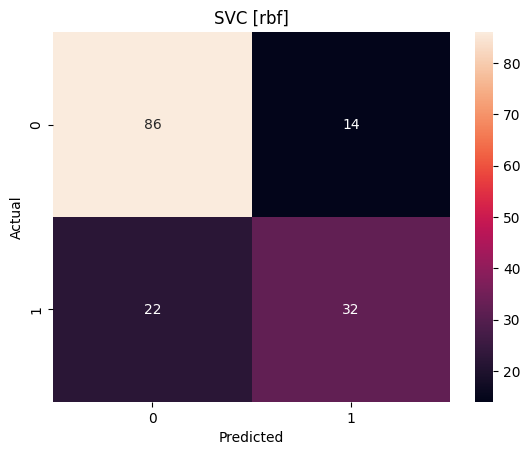

In [17]:
conf_mat = pd.crosstab(y_test, svc_prediction, rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(conf_mat, annot=True).set(title = 'SVC [rbf]')

In [18]:
model = SVC(kernel='linear', random_state=5)
model.fit(x_train, y_train)
svc_prediction = model.predict(x_test)
print("SVC predicion : ", svc_prediction)

SVC predicion :  [0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1]


In [19]:
print("SVC [kernel - linear]")
conf_mat = metrics.confusion_matrix(y_test, svc_prediction)
print("Confusion Matrix : \n", conf_mat)
Acc = metrics.accuracy_score(y_test, svc_prediction)
print("Accuracy : ", Acc)
print("Acc in percent : ", int(Acc*100), '%')
print(classification_report(y_test, svc_prediction))

SVC [kernel - linear]
Confusion Matrix : 
 [[88 12]
 [19 35]]
Accuracy :  0.7987012987012987
Acc in percent :  79 %
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       100
           1       0.74      0.65      0.69        54

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.80      0.80       154



[Text(0.5, 1.0, 'SVC [linear]')]

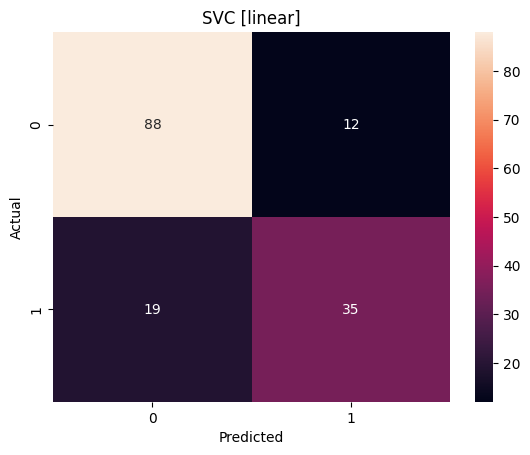

In [20]:
conf_mat = pd.crosstab(y_test, svc_prediction, rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(conf_mat, annot=True).set(title = 'SVC [linear]')